In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [2]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [3]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [4]:
dataset = pd.DataFrame(df)

In [5]:
dataset.head()

,x1,x2,y
0,0.454433,-0.717716,1
1,0.701849,0.846323,0
2,-1.088966,0.291044,0
3,-0.302858,0.712024,0
4,0.947734,0.262008,0


[]

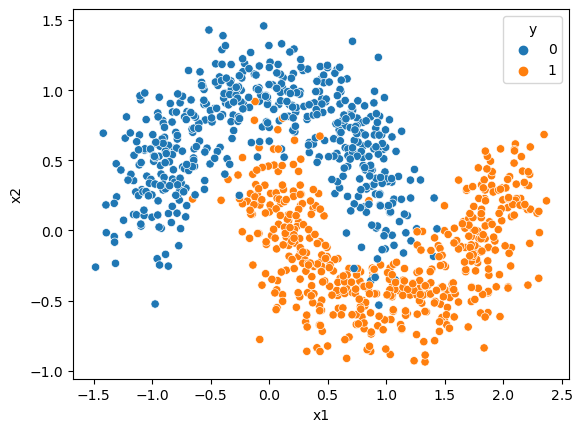

In [6]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.plot()

In [7]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [11]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 95.5)

In [12]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(96.625, 95.5)

In [13]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(86.125, 95.5)

In [14]:
from sklearn.ensemble import VotingClassifier

In [15]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb",GaussianNB())]

In [19]:
vc = VotingClassifier(li,weights=[10,4,7])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb', GaussianNB())],
                 weights=[10, 4, 7])

In [22]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.25, 98.5)

In [23]:
prd = {"dt":dt.predict(x_test),"svm":svm.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [24]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
195,0,0,0,0
196,1,1,1,1
197,1,1,1,1
198,0,0,0,0
